https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

# Import Everything

In [ ]:
# General
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clean Data

In [ ]:
smoking = pd.read_csv("/content/drive/MyDrive/Data/smoking.csv.zip")

smoking.dropna(inplace = True)

smoking["gender"].replace({"M": 0, "F": 1}, inplace = True)
smoking["tartar"].replace({"N": 0, "Y": 1}, inplace = True)

smoking.drop("oral", axis = 1, inplace = True)
smoking.drop("ID", axis = 1, inplace = True)

In [ ]:
all_factors =['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar']
important_factors = all_factors

# Call Data Information (Numbers)

In [ ]:
smoking

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


In [ ]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int64  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [ ]:
smoking.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

# Graphs

In [ ]:
# All graphs
# sns.pairplot(data = smoking)

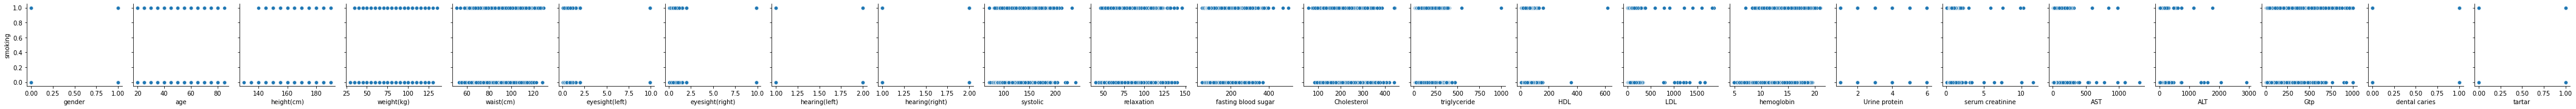

In [ ]:
# Graphs against smoking
sns.pairplot(data = smoking, x_vars = all_factors, y_vars =  "smoking")

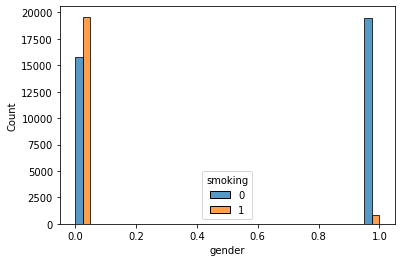

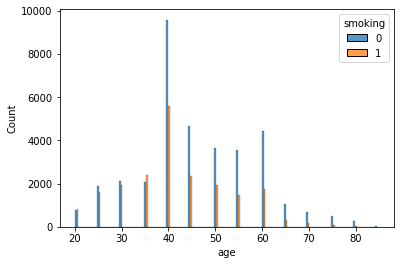

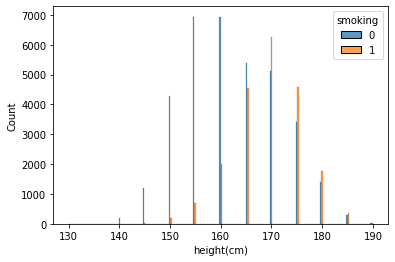

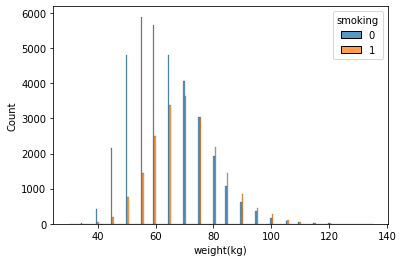

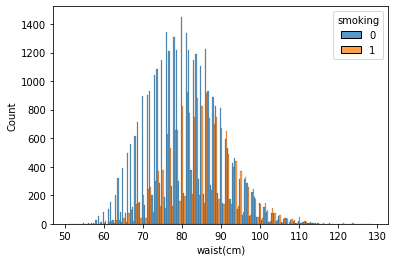

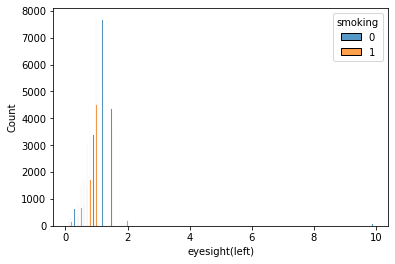

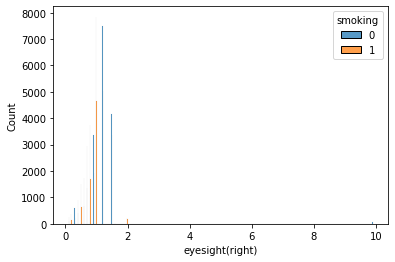

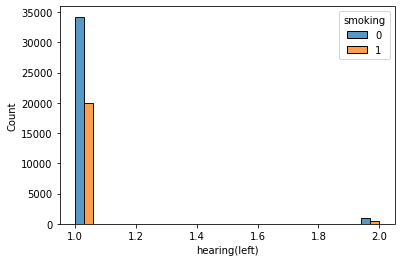

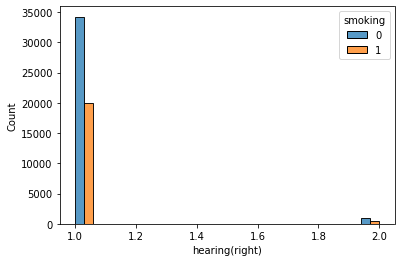

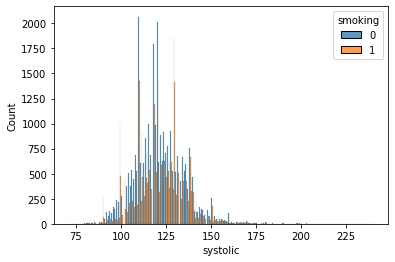

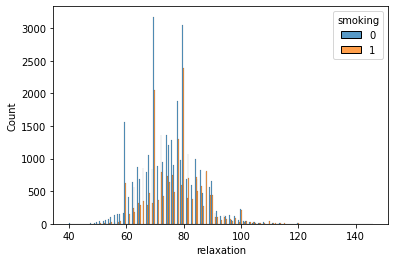

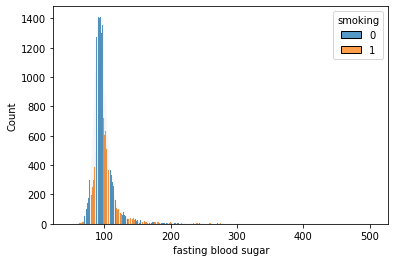

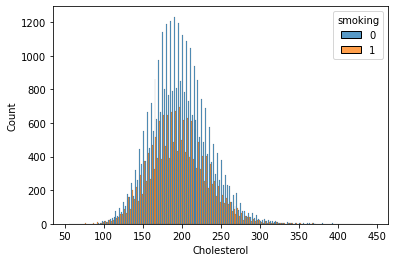

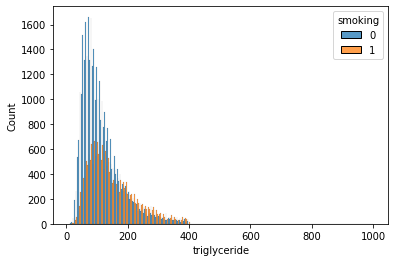

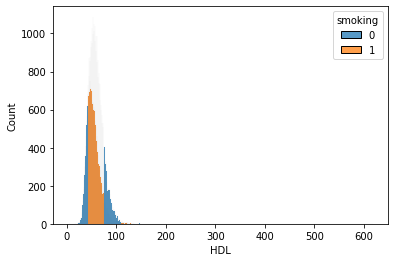

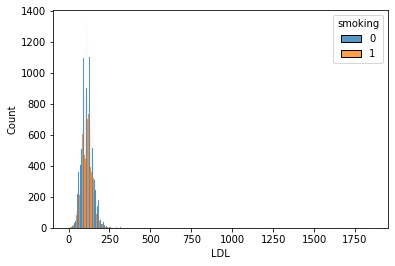

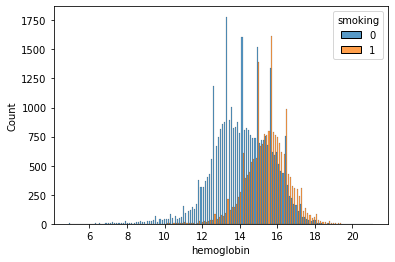

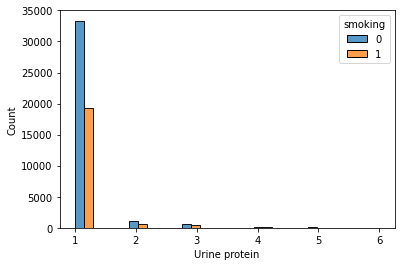

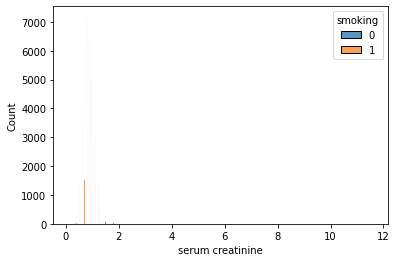

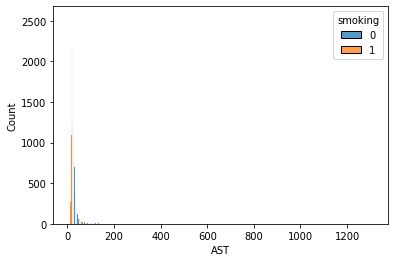

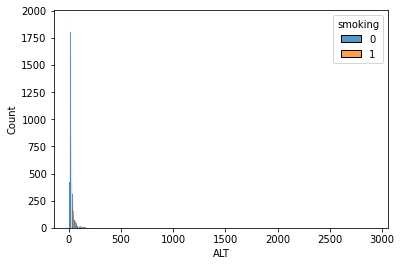

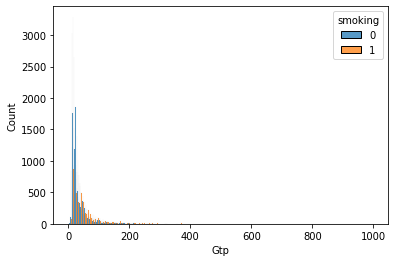

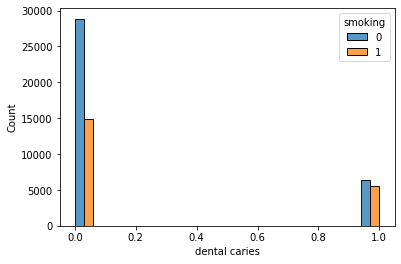

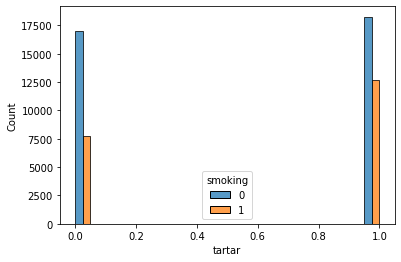

In [ ]:
for i in range(len(all_factors)):
  sns.histplot(data = smoking, x = all_factors[i], hue="smoking", multiple = 'dodge')
  plt.show()

#Prediction

In [ ]:
# Variables for KNN
X = smoking[all_factors]
y = smoking["smoking"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
# to calculate best k
error_rate=[]
for i in range (1,237):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))

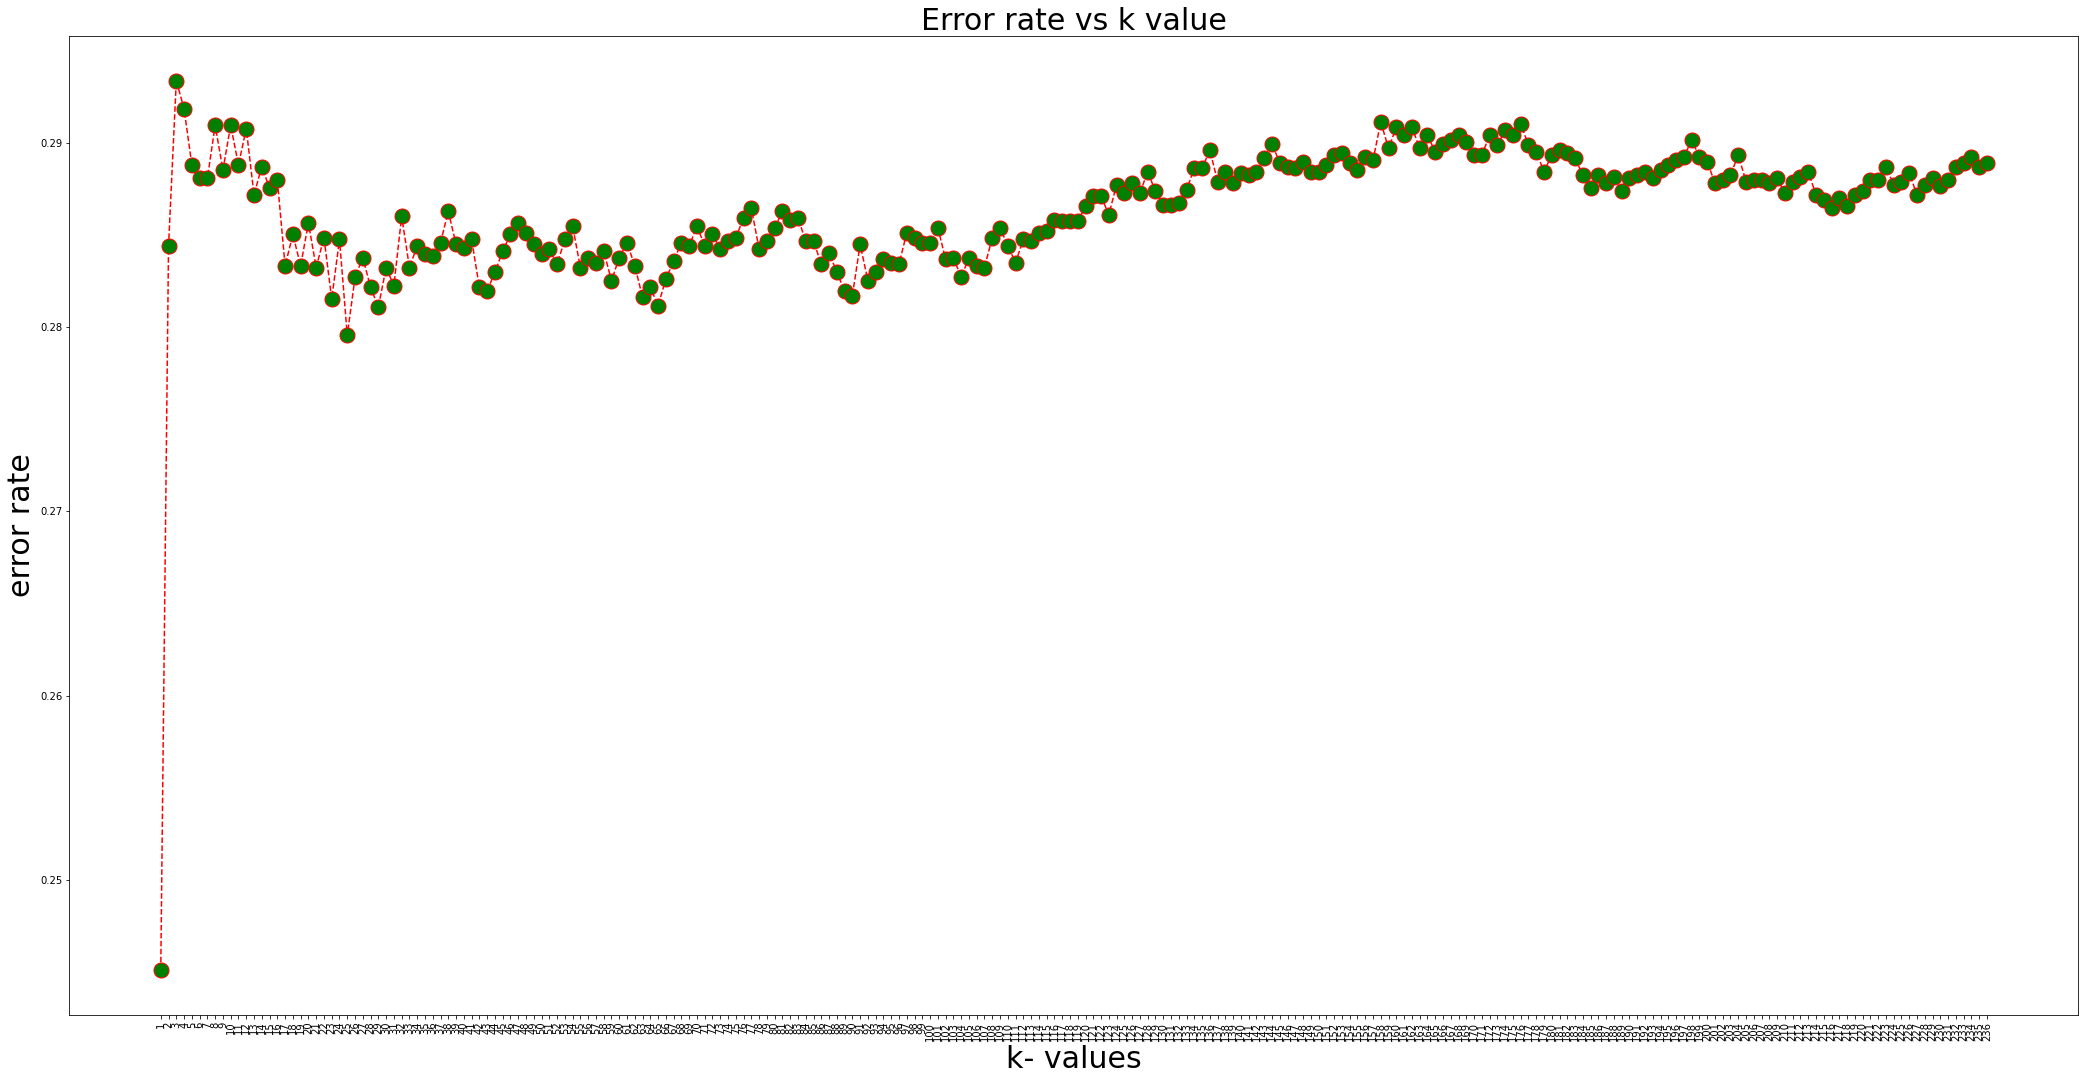

In [ ]:
# plotting the error rate vs k graph
plt.figure(figsize=(36,18))
plt.plot(range(1,237),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=30)
plt.xlabel("k- values",fontsize=30)
plt.ylabel("error rate",fontsize=30)
plt.xticks(range(1,237),rotation = 90)
plt.show()

In [ ]:
print(min(error_rate))

0.24508483705898196


In [ ]:
# Set up
k = 1
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
smoking.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

In [ ]:
# [0 - 1, 20 - 85, 130 - 190, 30 - 135, 51 - 129, 0.1 - 9.9, 0.1 - 9.9, 1 - 2, 1 - 2, 71 - 240, 40 - 146, 46 - 505, 55 - 445, 8 - 999, 4 - 618, 1 - 1.86k, 4.9 - 21.1, 1 - 6, 0.1 - 11.6, 6 - 1.31k, 0 - 1, 0 - 1]
personal_data = [1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0]

knn_classifier.predict([personal_data])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

#Performance

In [ ]:
y_predict = knn_classifier.predict(X_test)
knn_classifier.predict(X_test) == y_test

8006     False
43830    False
36729     True
45584     True
38090     True
         ...  
50443     True
19698     True
34960    False
45978     True
43639    False
Name: smoking, Length: 11139, dtype: bool

In [ ]:
print(round(sum(y_test == y_predict) / len(y_test) * 100))

75


#Confusion Matrix

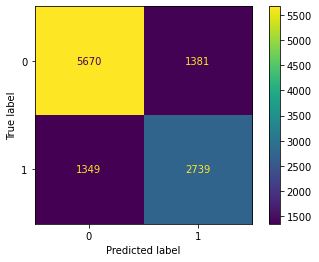

In [ ]:
cm = confusion_matrix(y_test, y_predict, labels = knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_classifier.classes_)
disp.plot()